# View HD205905
==================================================================================================

- author : Sylvie Dagoret-Campagne
- date   : May 30th 2017


Analysis of star HD205905 Night 30 May 2017 at CTIO.


- Main purpose : Spectrum in different gratings/holograms 
- Bougher line

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
import re
import os
from matplotlib.colors import LogNorm

In [7]:
from scipy import stats  
from scipy import ndimage
from datetime import datetime, timedelta
from mpl_toolkits.mplot3d import Axes3D
import scipy.signal

In [8]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [9]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [10]:
############################################################################
def ensure_dir(f):
    d = os.path.dirname(f)
    if not os.path.exists(f):
        os.makedirs(f)
#########################################################################

In [11]:
outputdir="processed_fitsimages"
ensure_dir(outputdir)

## Location of corrected images
----------------------------------

### User must fill its info below

In [12]:
rootpath_rawimage="../OverScanRemove/trim_images"
MIN_IMGNUMBER=208
MAX_IMGNUMBER=284
object_name='HD205905 May 30th'
SelectTagRe='^trim_20170530_([0-9]+).fits$' # regular expression to select the file
SearchTagRe='^trim_20170530_[0-9]+.fits$'
NBIMGPERLROW=4

In [13]:
#dirlist_all=os.listdir(rootpath_rawimage) 

In [14]:
#if '.DS_Store' in dirlist_all:
#    dirlist_all.remove('.DS_Store')
dirlist=[]
dirlist.append(rootpath_rawimage)
dirlist_all=np.array(dirlist)

In [15]:
print dirlist_all

['../OverScanRemove/trim_images']


In [16]:
indexes_files= [] # global list
filelist_fitsimages= []  # global list

In [17]:
def MakeFileList():
    """
    MakeFileList : Make The List of files to open
    =============
    
    - we select the files which are of interest.
    - In particular select the number range
    
    """
    count=0
    
    for dir in dirlist_all: # loop on directories, one per image   (if necessary)    
            dir_leaf= dir # build the name of leaf directory
            listfiles=os.listdir(dir_leaf) 
            for filename in listfiles:
                if re.search(SearchTagRe,filename):  #example of filename filter
                    str_index=re.findall(SelectTagRe,filename)
                    count=count+1
                    index=int(str_index[0])
                    if index >= MIN_IMGNUMBER and index <= MAX_IMGNUMBER: 
                        indexes_files.append(index)         
                        shortfilename=dir_leaf+'/'+filename
                        filelist_fitsimages.append(shortfilename)
                    
    return

In [18]:
MakeFileList()   # Make the list

In [19]:
indexes_files=np.array(indexes_files)
filelist_fitsimages=np.array(filelist_fitsimages)

In [20]:
print len(indexes_files)

75


In [21]:
print len(filelist_fitsimages)

75


In [22]:
print indexes_files

[210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284]


In [23]:
len(indexes_files)

75

In [24]:
filelist_fitsimages

array(['../OverScanRemove/trim_images/trim_20170530_210.fits',
       '../OverScanRemove/trim_images/trim_20170530_211.fits',
       '../OverScanRemove/trim_images/trim_20170530_212.fits',
       '../OverScanRemove/trim_images/trim_20170530_213.fits',
       '../OverScanRemove/trim_images/trim_20170530_214.fits',
       '../OverScanRemove/trim_images/trim_20170530_215.fits',
       '../OverScanRemove/trim_images/trim_20170530_216.fits',
       '../OverScanRemove/trim_images/trim_20170530_217.fits',
       '../OverScanRemove/trim_images/trim_20170530_218.fits',
       '../OverScanRemove/trim_images/trim_20170530_219.fits',
       '../OverScanRemove/trim_images/trim_20170530_220.fits',
       '../OverScanRemove/trim_images/trim_20170530_221.fits',
       '../OverScanRemove/trim_images/trim_20170530_222.fits',
       '../OverScanRemove/trim_images/trim_20170530_223.fits',
       '../OverScanRemove/trim_images/trim_20170530_224.fits',
       '../OverScanRemove/trim_images/trim_20170530_225

In [25]:
len(filelist_fitsimages)

75

In [26]:
#sorted_dates=np.argsort(filelist_fitsimages)

In [27]:
sorted_indexes=np.argsort(indexes_files) # sort the file indexes

In [28]:
sorted_indexes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74])

In [29]:
#print sorted_dates

In [30]:
print sorted_indexes

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]


In [31]:
#sorted_files= [filelist_fitsimages[index] for index in sorted_indexes] # sort files
sorted_files=filelist_fitsimages[sorted_indexes]

In [32]:
#sorted_numbers= [indexes_files[index] for index in sorted_indexes]
sorted_numbers=indexes_files[sorted_indexes]

In [33]:
sorted_numbers

array([210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
       249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
       262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284])

In [34]:
sorted_files

array(['../OverScanRemove/trim_images/trim_20170530_210.fits',
       '../OverScanRemove/trim_images/trim_20170530_211.fits',
       '../OverScanRemove/trim_images/trim_20170530_212.fits',
       '../OverScanRemove/trim_images/trim_20170530_213.fits',
       '../OverScanRemove/trim_images/trim_20170530_214.fits',
       '../OverScanRemove/trim_images/trim_20170530_215.fits',
       '../OverScanRemove/trim_images/trim_20170530_216.fits',
       '../OverScanRemove/trim_images/trim_20170530_217.fits',
       '../OverScanRemove/trim_images/trim_20170530_218.fits',
       '../OverScanRemove/trim_images/trim_20170530_219.fits',
       '../OverScanRemove/trim_images/trim_20170530_220.fits',
       '../OverScanRemove/trim_images/trim_20170530_221.fits',
       '../OverScanRemove/trim_images/trim_20170530_222.fits',
       '../OverScanRemove/trim_images/trim_20170530_223.fits',
       '../OverScanRemove/trim_images/trim_20170530_224.fits',
       '../OverScanRemove/trim_images/trim_20170530_225

## Build full filename
----------------------------

In [35]:
sorted_filenames=[]
for file in sorted_files:
    #fullfilename=os.path.join(rootpath_rawimage,file)
    fullfilename=file
    sorted_filenames.append(fullfilename)

In [36]:
sorted_filenames=np.array(sorted_filenames)

In [37]:
sorted_filenames

array(['../OverScanRemove/trim_images/trim_20170530_210.fits',
       '../OverScanRemove/trim_images/trim_20170530_211.fits',
       '../OverScanRemove/trim_images/trim_20170530_212.fits',
       '../OverScanRemove/trim_images/trim_20170530_213.fits',
       '../OverScanRemove/trim_images/trim_20170530_214.fits',
       '../OverScanRemove/trim_images/trim_20170530_215.fits',
       '../OverScanRemove/trim_images/trim_20170530_216.fits',
       '../OverScanRemove/trim_images/trim_20170530_217.fits',
       '../OverScanRemove/trim_images/trim_20170530_218.fits',
       '../OverScanRemove/trim_images/trim_20170530_219.fits',
       '../OverScanRemove/trim_images/trim_20170530_220.fits',
       '../OverScanRemove/trim_images/trim_20170530_221.fits',
       '../OverScanRemove/trim_images/trim_20170530_222.fits',
       '../OverScanRemove/trim_images/trim_20170530_223.fits',
       '../OverScanRemove/trim_images/trim_20170530_224.fits',
       '../OverScanRemove/trim_images/trim_20170530_225

## Acces to data of  images
----------------------------------

In [38]:
all_dates = []
all_airmass = []
all_images = []
all_titles = []
all_header = []
all_img = []
all_filt= []

In [39]:
def BuildRawImages():
    """
    BuildRawImages
    ===============
    """

    global all_dates
    global all_airmass
    global all_images
    global all_titles
    global all_header
    global all_img 
    global sorted_filenames
    global all_filt

    for idx,file in np.ndenumerate(sorted_filenames):   
        hdu_list=fits.open(file)
        header=hdu_list[0].header
        date_obs = header['DATE-OBS']
        airmass = header['AIRMASS']
        filters = header['FILTERS']
        num=sorted_numbers[idx[0]]
        title=object_name+" z= {:3.2f} Nb={}".format(float(airmass),num)
        image_corr=hdu_list[0].data
        image=image_corr
        all_dates.append(date_obs)
        all_airmass.append(float(airmass))
        all_images.append(image)
        all_titles.append(title)
        all_header.append(header)
        all_filt.append(filters)
        hdu_list.close()

In [40]:
BuildRawImages()

In [41]:
all_header[0]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBJECT  = 'HD205905'           / Name of object observed                        
OBSERVER= '        '           / observer                                       
PROPID  = '        '           / Proposal ID                                    
RECID   = 'ct36.20170531.075438' / NOAO Archibe record ID                       
PROPID  = '        '           / Proposal ID                                    
IMAGETYP= 'object  '        

## Show images
-----------------------

In [49]:
def ShowRawImages():
    """
    ShowRawImages: Show the raw images without background subtraction
    ==============
    """
    #global all_images
    #global all_titles
    #global object_name

    
    NBIMAGES=len(all_images)
    MAXIMGROW=int(NBIMAGES/NBIMGPERLROW)+1

    f, axarr = plt.subplots(MAXIMGROW,NBIMGPERLROW,figsize=(20,5*MAXIMGROW))
    for index in np.arange(0,NBIMAGES):
        ix=index%NBIMGPERLROW
        iy=index/NBIMGPERLROW
        #im=axarr[iy,ix].imshow(all_images[index],origin='lower',cmap='rainbow',norm=LogNorm(vmin=0.1, vmax=10))
        im=axarr[iy,ix].imshow(all_images[index],origin='lower',cmap='rainbow',vmin=0, vmax=1000)
        #axarr[iy,ix].annotate(all_filt[index], xy=(1000., 1500.),fontsize=16,color='yellow')
        axarr[iy,ix].text(1000.,1700,all_filt[index],verticalalignment='bottom', horizontalalignment='center',color='yellow', fontweight='bold',fontsize=16)
        axarr[iy,ix].set_title(all_titles[index])
        axarr[iy,ix].grid(color='white', ls='solid')
    title='Raw images of {}'.format(object_name)
    plt.suptitle(title,size=16)        

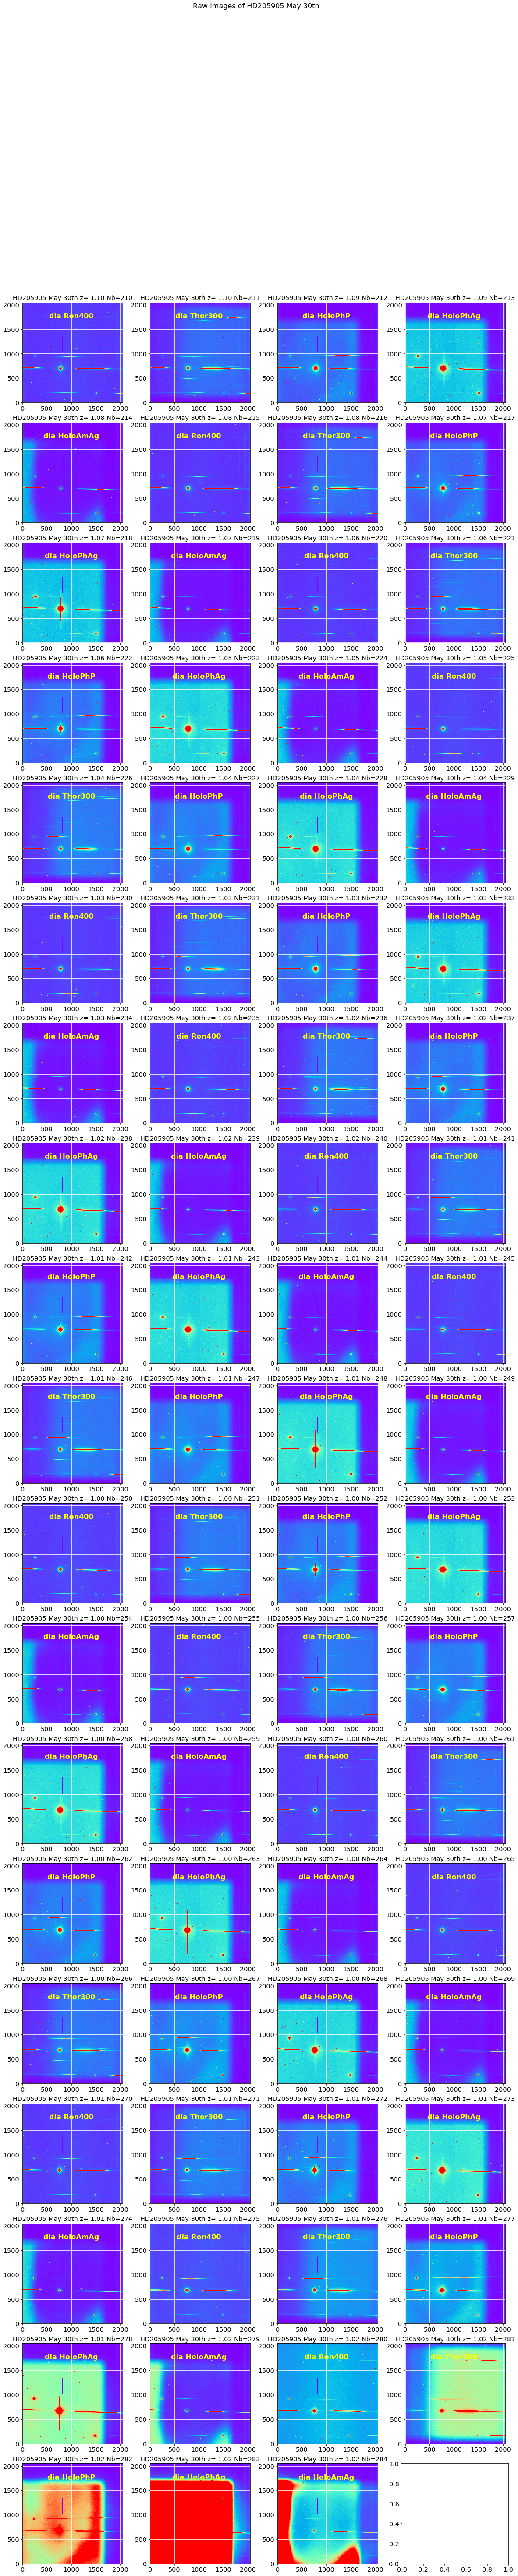

In [50]:
ShowRawImages()

## Show histograms
===========================

In [47]:
def ShowHistograms():
    """
    ShowHistograms
    ==============
    """
    global all_images
    global all_titles
    global object_name


    NBIMAGES=len(all_images)
    MAXIMGROW=int(NBIMAGES/NBIMGPERLROW)+1
    
    f, axarr = plt.subplots(MAXIMGROW,NBIMGPERLROW,figsize=(20,3*MAXIMGROW))
    for index in np.arange(0,NBIMAGES):
        ix=index%NBIMGPERLROW
        iy=index/NBIMGPERLROW
        image_flat=all_images[index].flatten()
        stat_mean=image_flat.mean()
        stat_rms=image_flat.std()
        legtitle='mean={:4.2f} std={:4.2f}'.format(stat_mean,stat_rms)
        axarr[iy,ix].hist(image_flat,bins=100,range=(-50,10000),facecolor='blue', alpha=0.75,label=legtitle);
        axarr[iy,ix].set_yscale('log')
        axarr[iy,ix].grid(True)
        axarr[iy,ix].set_ylim(0.,1e10)
        axarr[iy,ix].set_title(all_titles[index])
        axarr[iy,ix].legend(loc='best')  #useless
    title='histograms of images {}  '.format(object_name)
    plt.suptitle(title,size=16)        

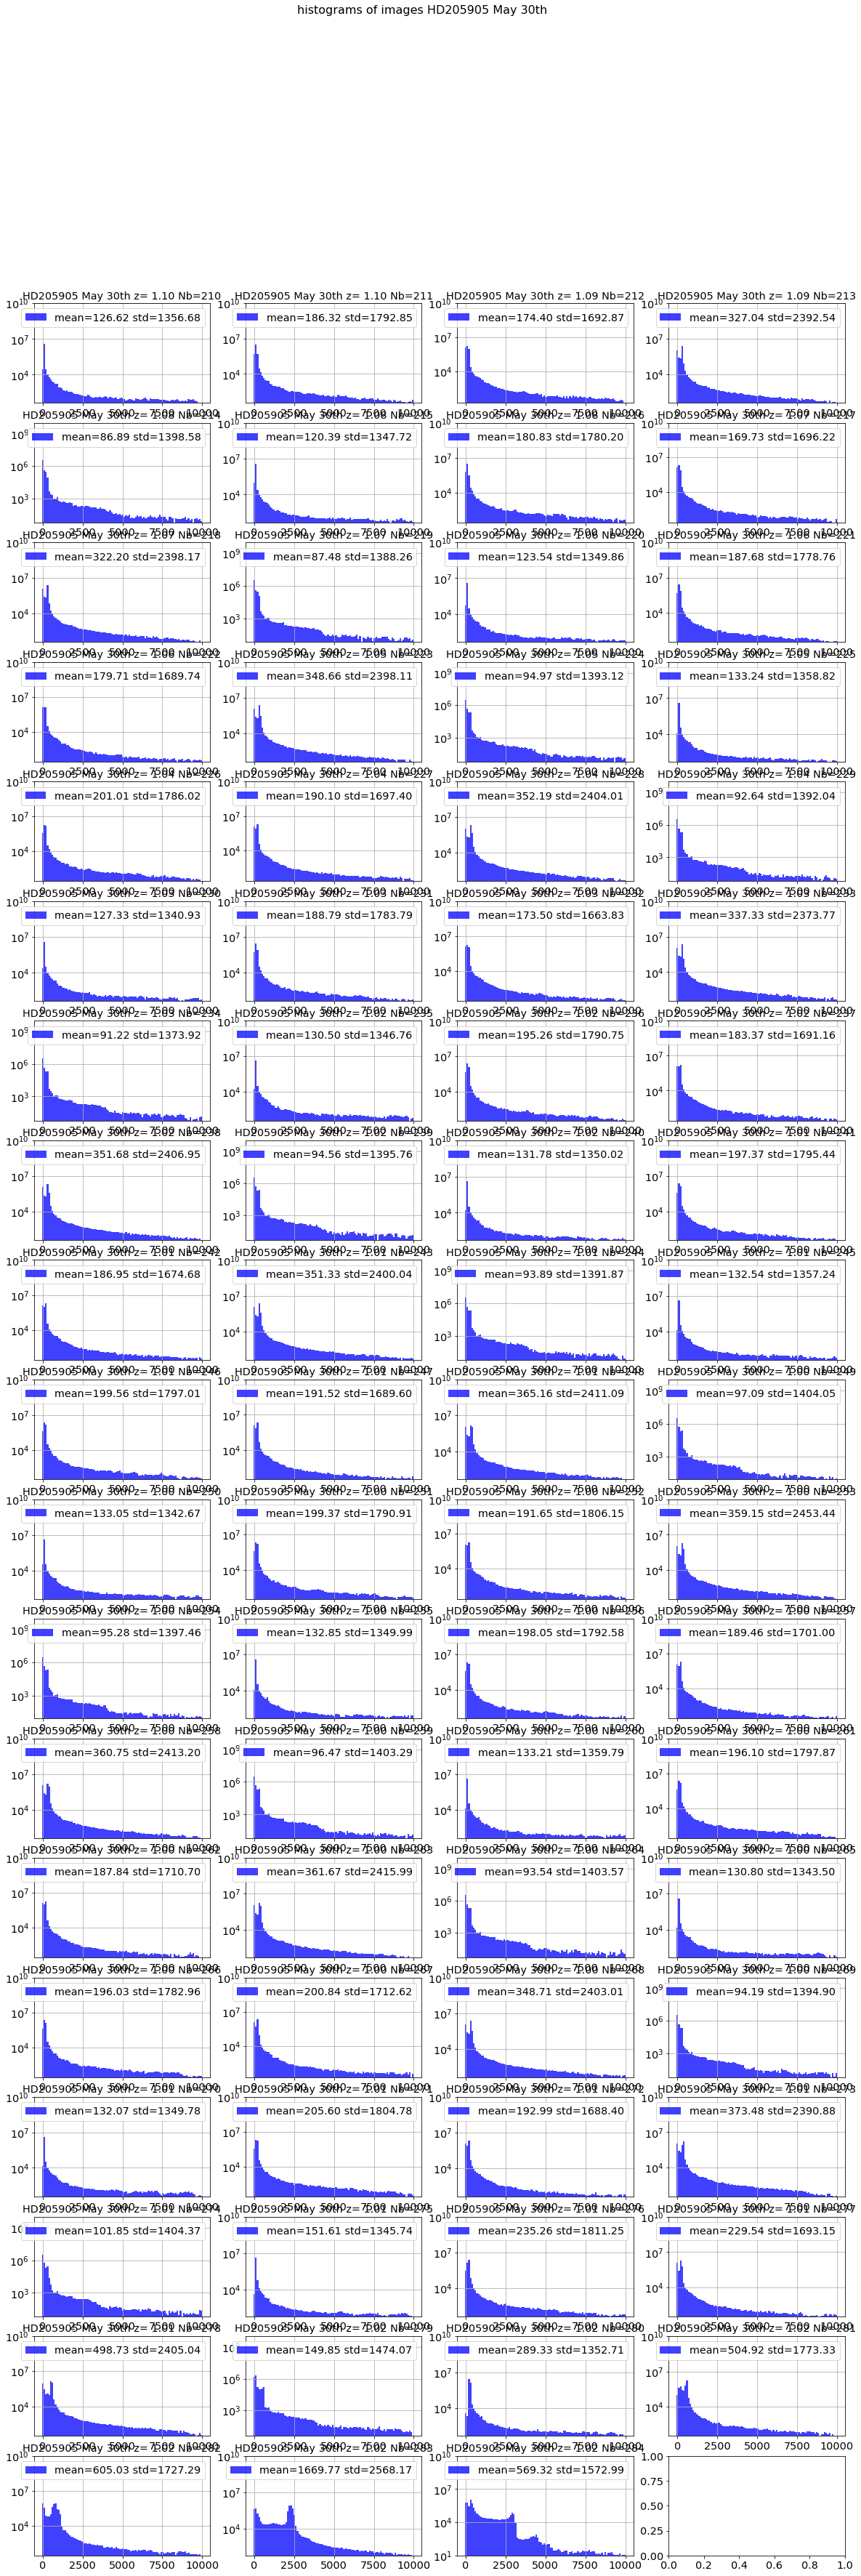

In [48]:
ShowHistograms()